In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
export = pd.read_csv('data\waak\\test\export.csv')

<AxesSubplot:xlabel='X', ylabel='Y'>

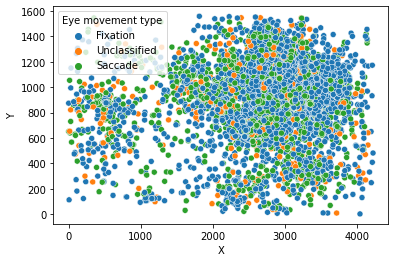

In [71]:
export = export[export['X'] >= 0]
export = export[export['Y'] >= 0]
export = export[export['X'] <= 4225]
export = export[export['Y'] <= 1560]

sns.scatterplot(x=export['X'], y=export['Y'], hue=export['Eye movement type'])

In [59]:
x1 = 1000
y1 = 400
w = 1200
h = 600

interval_min = 0
interval_max = 1920
export['X'] = (export['X'] - np.min(export['X'])) / (np.max(export['X']) - np.min(export['X'])) * (interval_max - interval_min) + interval_min

interval_min = 0
interval_max = 1080
export['Y'] = (export['Y'] - np.min(export['Y'])) / (np.max(export['Y']) - np.min(export['Y'])) * (interval_max - interval_min) + interval_min


x2, y2 = x1+w, y1+h

export['S_DOWN_X'] = export['X'].shift(1)
export['S_UP_X'] = export['X'].shift(-1)
export['S_DOWN_Y'] = export['X'].shift(1)
export['S_UP_Y'] = export['Y'].shift(-1)

in_aoi = (x1 < export['X']) & (export['X'] < x2) & (y1 < export['Y']) & (export['Y'] < y2)
enter_aoi = in_aoi & ~((x1 < export['S_DOWN_X']) & (export['S_DOWN_X'] < x2) & (y1 < export['S_DOWN_Y']) & (export['S_DOWN_Y'] < y2))
exit_aoi = in_aoi & ~((x1 < export['S_UP_X']) & (export['S_UP_X'] < x2) & (y1 < export['S_UP_Y']) & (export['S_UP_Y'] < y2))

export['ENTER'] = enter_aoi
export['IN'] = in_aoi
export['EXIT'] = exit_aoi

export.drop(export[(export['ENTER'] == False) & (export['IN'] == False) & (export['EXIT'] == False)].index, inplace=True)



In [60]:
visits = []
collecting = False

for index, row in export.iterrows():
    
    if not collecting:
        tmp_visit = []

    if row['ENTER'] == True and row['EXIT'] == False:
        tmp_visit.append(row)
        collecting = True

    if collecting == True and row['IN'] == True:
        tmp_visit.append(row)

    if row['ENTER'] == False and row['EXIT'] == True:
        tmp_visit = pd.DataFrame(tmp_visit)
        if len(tmp_visit) == 0:
            collecting = False
            continue

        if 'Fixation' in tmp_visit['Eye movement type'].unique():
            visits.append(tmp_visit)
        collecting = False


In [61]:
# for visit in visits:
#     print(visit['Recording timestamp'])

len(visits)

0

In [62]:
visits = np.array(visits, dtype=object)

<AxesSubplot:xlabel='X', ylabel='Y'>

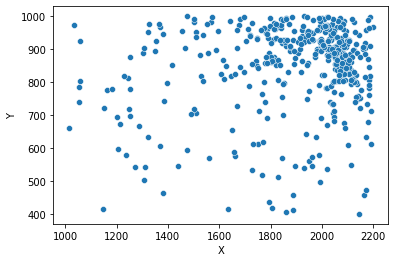

In [63]:
sns.scatterplot(x=export['X'], y=export['Y'])